In [7]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [95]:
import pandas as pd
ad = pd.read_csv("Car_price_cleaned.csv")
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df = df.copy()
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight_squared,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize
0,1,3,1,0,1,0,2,0,-1.690772,-0.426521,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
1,2,3,1,0,1,0,2,0,-1.690772,-0.426521,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
2,3,1,1,0,1,2,2,0,-0.708596,-0.231513,...,7969329,23104,7.1824,12.0409,81.0,23716,25000000,361,676,5.030438
3,4,2,1,0,0,3,1,0,0.173698,0.207256,...,5461569,11881,10.1761,11.5600,100.0,10404,30250000,576,900,4.700480
4,5,2,1,0,0,3,0,0,0.107110,0.207256,...,7974976,18496,10.1761,11.5600,64.0,13225,30250000,324,484,4.919981


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,1.030000e+02,5.932256e+01,1.000000e+00,5.200000e+01,1.030000e+02,1.540000e+02,2.050000e+02
symboling,205.0,8.341463e-01,1.245307e+00,-2.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
fueltype,205.0,9.024390e-01,2.974465e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
aspiration,205.0,1.804878e-01,3.855347e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
doornumber,205.0,4.390244e-01,4.974829e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
carbody,205.0,2.614634e+00,8.590810e-01,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
drivewheel,205.0,1.326829e+00,5.561706e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
enginelocation,205.0,1.463415e-02,1.203772e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
wheelbase,205.0,-1.256448e-15,1.002448e+00,-2.023713e+00,-7.085959e-01,-2.924196e-01,6.065210e-01,3.686225e+00
carlength,205.0,3.691356e-15,1.002448e+00,-2.677244e+00,-6.296552e-01,-6.900603e-02,7.354037e-01,2.766741e+00


In [99]:
df.isnull().values.any()

False

In [101]:
df.corr()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight_squared,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize
car_ID,1.000000,-0.151621,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,0.170636,...,0.036202,-0.078822,0.260587,-0.162609,0.148533,-0.019594,-0.204893,-0.023611,-0.017436,0.021369
symboling,-0.151621,1.000000,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,-0.236671,-0.089206,-0.128438,-0.003567,-0.179647,0.077912,0.266609,-0.012111,0.041842,-0.128053
fueltype,-0.125568,0.194311,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,-0.221943,-0.036090,-0.055511,-0.243359,-0.991709,0.142254,0.453793,-0.254841,-0.207156,-0.096957
aspiration,0.067729,-0.059866,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.310994,0.050565,0.215725,0.231845,0.334178,0.177224,-0.176900,-0.200254,-0.249370,0.158960
doornumber,-0.190352,0.664073,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,...,-0.187431,0.009120,-0.112732,0.010969,-0.181913,0.153551,0.247700,0.041177,0.047352,-0.058756
carbody,0.098303,-0.596135,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,0.126234,-0.080259,0.006043,-0.013577,0.138596,-0.161815,-0.111122,0.013135,-0.014230,-0.052851
drivewheel,0.051406,-0.041671,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.572193,0.475479,0.486464,0.071915,0.118280,0.467854,-0.024714,-0.411884,-0.424078,0.531860
enginelocation,0.051483,0.212471,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.037392,0.169477,0.191152,-0.140776,-0.028422,0.347196,0.206637,-0.130971,-0.098950,0.201986
wheelbase,0.129729,-0.531954,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.779766,0.521781,0.488411,0.178913,0.261761,0.272997,-0.351729,-0.453105,-0.512591,0.593749
carlength,0.170636,-0.357612,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.856286,0.607030,0.602958,0.150709,0.172177,0.457182,-0.285182,-0.650193,-0.676871,0.731592


In [117]:
import statsmodels.formula.api as smf
lm = smf.ols("fueltype ~ peakrpm", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fueltype   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     59.75
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           4.88e-13
Time:                        20:10:53   Log-Likelihood:                -15.368
No. Observations:                 205   AIC:                             34.74
Df Residuals:                     203   BIC:                             41.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9024      0.018     49.300      0.000       0.866       0.939
peakrpm        0.1415      0.018      7.730      0.000       0.105       0.178
==============================================================================
Omnibus:                       73.351   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.023
Skew:                          -1.725   Prob(JB):                     4.85e-35
Kurtosis:                       5.568   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
model.params

Intercept    0.902439
peakrpm      0.141501
dtype: float64

In [124]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.9024,0.018,49.300,0.000,0.866,0.939
peakrpm,0.1415,0.018,7.730,0.000,0.105,0.178


In [127]:
model.rsquared_adj

0.22361122675870082

In [131]:
model.fittedvalues[0:5]

0    0.865230
1    0.865230
2    0.865230
3    1.013921
4    1.013921
dtype: float64

In [143]:
from sklearn.linear_model import LinearRegression

In [179]:
X = df[["fueltype"]]
y = df["peakrpm"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([1.60717998])

In [181]:
model.score(X,y)

0.22741705407851132

In [183]:
model.predict(X)[0:10]

array([0.15679805, 0.15679805, 0.15679805, 0.15679805, 0.15679805,
       0.15679805, 0.15679805, 0.15679805, 0.15679805, 0.15679805])

In [185]:
yeni_veri = [[90],[225],[450],[900]]

In [187]:
model.predict(yeni_veri)

array([ 143.1958162 ,  360.16511341,  721.78060875, 1445.01159943])

In [190]:
from sklearn.metrics import mean_squared_error, r2_score

In [195]:
lm = smf.ols("fueltype ~ peakrpm", df)
model = lm.fit()

In [198]:
mse = mean_squared_error(y, model.fittedvalues)

In [205]:
mse

1.551417281458586

In [208]:
import numpy as np
rmse = np.sqrt(mse)

In [211]:
rmse

1.2455590236751473

In [214]:
reg.predict(X)[0:10]

array([0.15679805, 0.15679805, 0.15679805, 0.15679805, 0.15679805,
       0.15679805, 0.15679805, 0.15679805, 0.15679805, 0.15679805])

In [217]:
y[0:10]

0   -0.262960
1   -0.262960
2   -0.262960
3    0.787855
4    0.787855
5    0.787855
6    0.787855
7    0.787855
8    0.787855
9    0.787855
Name: peakrpm, dtype: float64

In [224]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [227]:
k_t

,gercek_y,tahmin_y
0,-0.262960,0.156798
1,-0.262960,0.156798
2,-0.262960,0.156798
3,0.787855,0.156798
4,0.787855,0.156798
5,0.787855,0.156798
6,0.787855,0.156798
7,0.787855,0.156798
8,0.787855,0.156798
9,0.787855,0.156798


In [231]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [245]:
k_t

,gercek_y,tahmin_y,hata
0,-0.262960,0.156798,-0.419758
1,-0.262960,0.156798,-0.419758
2,-0.262960,0.156798,-0.419758
3,0.787855,0.156798,0.631057
4,0.787855,0.156798,0.631057
5,0.787855,0.156798,0.631057
6,0.787855,0.156798,0.631057
7,0.787855,0.156798,0.631057
8,0.787855,0.156798,0.631057
9,0.787855,0.156798,0.631057


In [247]:
k_t["hata_kare"] = k_t["hata"]**2

In [250]:
np.sqrt(np.mean(k_t["hata_kare"]))

0.5758667579196387

In [253]:
model.resid[0:10]

0    0.134770
1    0.134770
2    0.134770
3   -0.013921
4   -0.013921
5   -0.013921
6   -0.013921
7   -0.013921
8   -0.013921
9   -0.013921
dtype: float64

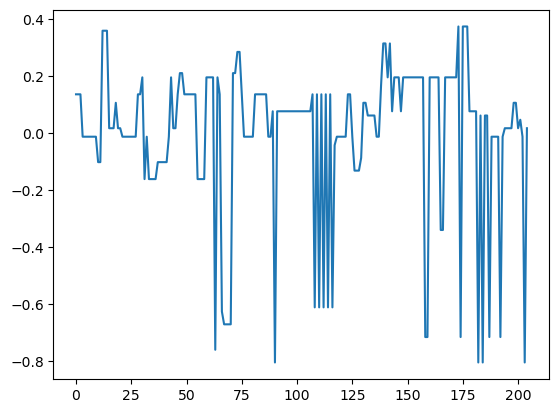

In [263]:
plt.plot(model.resid);

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [310]:
import pandas as pd
df = pd.read_csv("Car_price_cleaned.csv")
df= df.select_dtypes(include = ['float64', 'int64'])
x = ad.drop
y = df["peakrpm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [314]:
X_train.shape

(164, 1)

In [316]:
y_train.shape

(164,)

In [320]:
X_test.shape

(41, 1)

In [328]:
y_test.shape

(41,)

In [331]:
training = df.copy()

In [335]:
training.shape

(205, 42)

In [342]:
training.shape

(205, 42)

In [344]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fueltype   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     59.75
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           4.88e-13
Time:                        20:33:49   Log-Likelihood:                -15.368
No. Observations:                 205   AIC:                             34.74
Df Residuals:                     203   BIC:                             41.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9024      0.018     49.300      0.000       0.866       0.939
peakrpm        0.1415      0.018      7.730      0.000       0.105       0.178
==============================================================================
Omnibus:                       73.351   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.023
Skew:                          -1.725   Prob(JB):                     4.85e-35
Kurtosis:                       5.568   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [346]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.9024,0.018,49.300,0.000,0.866,0.939
peakrpm,0.1415,0.018,7.730,0.000,0.105,0.178


In [358]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [361]:
model.coef_

array([1.66752929])

In [366]:
model.intercept_

-1.4749009650290235

In [390]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [515]:
df = pd.read_csv("Car_price_cleaned.csv")
df= df.select_dtypes(include = ['float64', 'int64'])
x = ad.drop
y = df["peakrpm"]


In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (153, 1)
y_train (153,)
X_test (52, 1)
y_test (52,)
training (205, 42)


In [519]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [521]:
X_reduced_train[0:1,:]

array([[3.28165062]])

In [523]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([100.])

In [525]:
lm = LinearRegression()

In [527]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [529]:
pcr_model.intercept_

0.06670744769733457

In [531]:
pcr_model.coef_

array([-0.44529887])

In [534]:
y_pred = pcr_model.predict(X_reduced_train)

In [536]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.9249625726467714

In [538]:
df["fueltype"].mean()

0.9024390243902439

In [540]:
r2_score(y_train, y_pred)

0.18815930037509487

In [542]:
pca2 = PCA()

In [544]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [546]:
y_pred = pcr_model.predict(X_reduced_test)

In [548]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.7619074836205959

In [551]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7619074836205959


In [553]:
from sklearn import model_selection

In [555]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [557]:
lm = LinearRegression()

In [559]:
RMSE = []

In [561]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

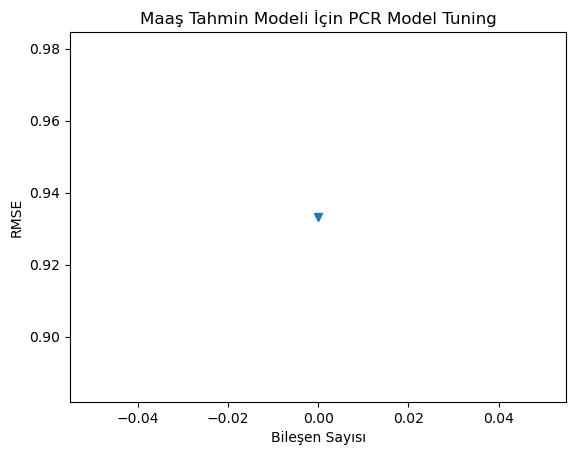

In [563]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [568]:
lm = LinearRegression()

In [570]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [581]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [583]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

0.9249625726467714


In [587]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [589]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7619074836205959
